# Linear Discriminant Analysis (LDA)

In [2]:
library(klaR)
library(psych)
library(ggplot2)
library(MASS)

In [4]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


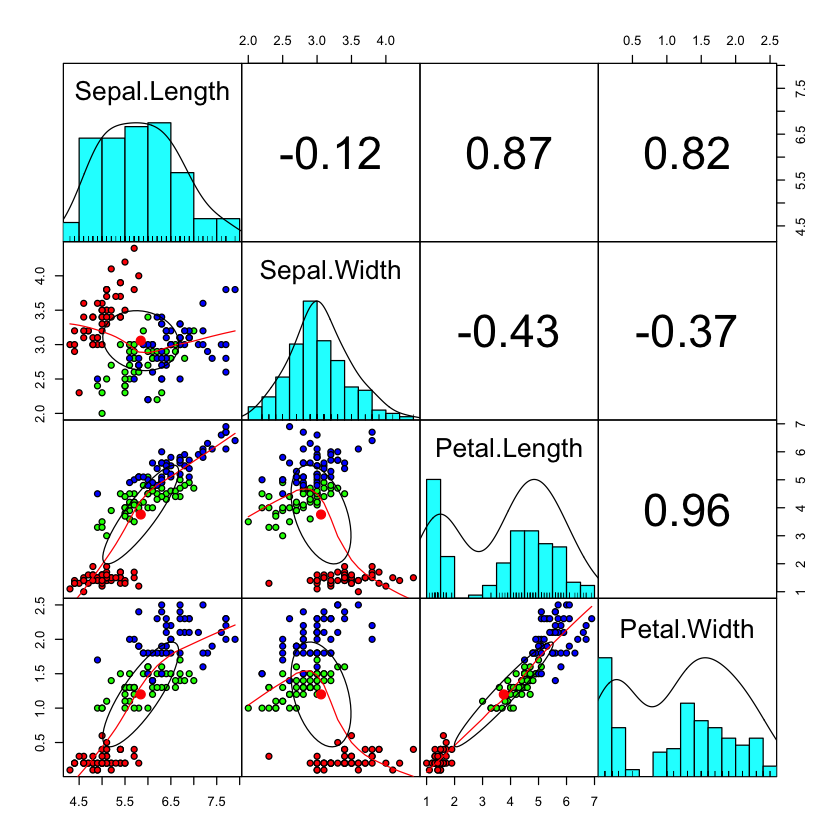

In [5]:
pairs.panels(iris[1:4],
                gap = 0,
                bg = c("red","green","blue")[iris$Species],
                pch = 21)

In [29]:
# Run the LDA

#suggestion, if MANOVA is not significant, we may not need LDA

#Use dat instead of iris if to run LDA on standardized data
# linear discriminant analysis in R
fit = lda(Species ~ ., data=iris)
fit

#In the dataset, the proportions are 0.33 , 0.33 and 0.33 for setosa, versicolor, virginica 
#The first Linear discrimanant component is 
# 0.8293776 * Sepal.Length + 1.5344732 * Sepal.Width - 2.2012117 * Petal.Length - 2.8104603 * Petal.Width ) ( related to a direction ) 

Call:
lda(Species ~ ., data = iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.8293776  0.02410215
Sepal.Width   1.5344731  2.16452123
Petal.Length -2.2012117 -0.93192121
Petal.Width  -2.8104603  2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 

Warning message in rect(breaks[-n], 0, breaks[-1L], est[[grp]], col = col, ...):
""gdata" is not a graphical parameter"
Warning message in rect(breaks[-n], 0, breaks[-1L], est[[grp]], col = col, ...):
""gdata" is not a graphical parameter"
Warning message in rect(breaks[-n], 0, breaks[-1L], est[[grp]], col = col, ...):
""gdata" is not a graphical parameter"
Warning message in rect(breaks[-n], 0, breaks[-1L], est[[grp]], col = col, ...):
""gdata" is not a graphical parameter"
Warning message in rect(breaks[-n], 0, breaks[-1L], est[[grp]], col = col, ...):
""gdata" is not a graphical parameter"


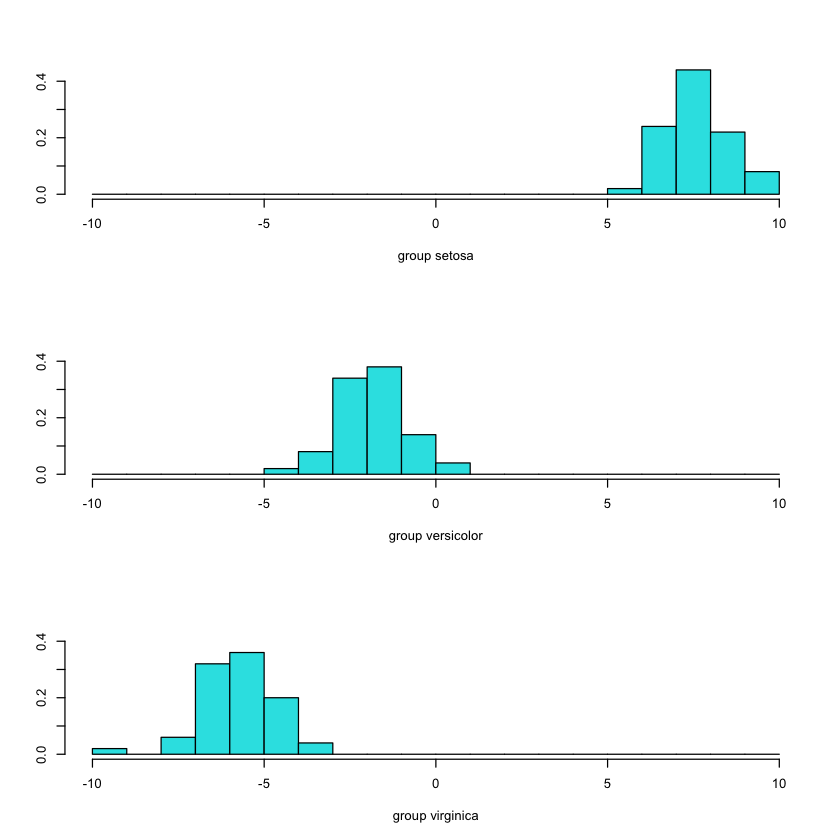

Warning message in rect(breaks[-n], 0, breaks[-1L], est[[grp]], col = col, ...):
""gdata" is not a graphical parameter"


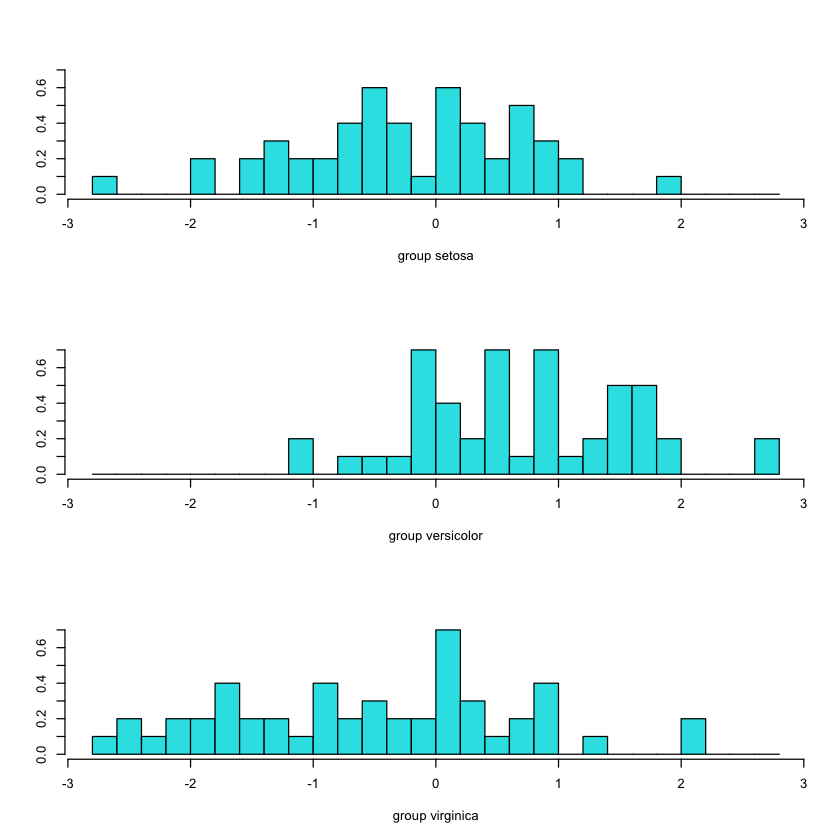

In [48]:
#stacked histogram for discriminant function values

p.result = predict(fit,iris)

#p. results$x[,1] is the projection of all observations on to LD1 direction

ldahist(data=p.result$x[,1], g= iris$Species, gdata=iris)

ldahist(data=p.result$x[,2], g= iris$Species, gdata=iris)

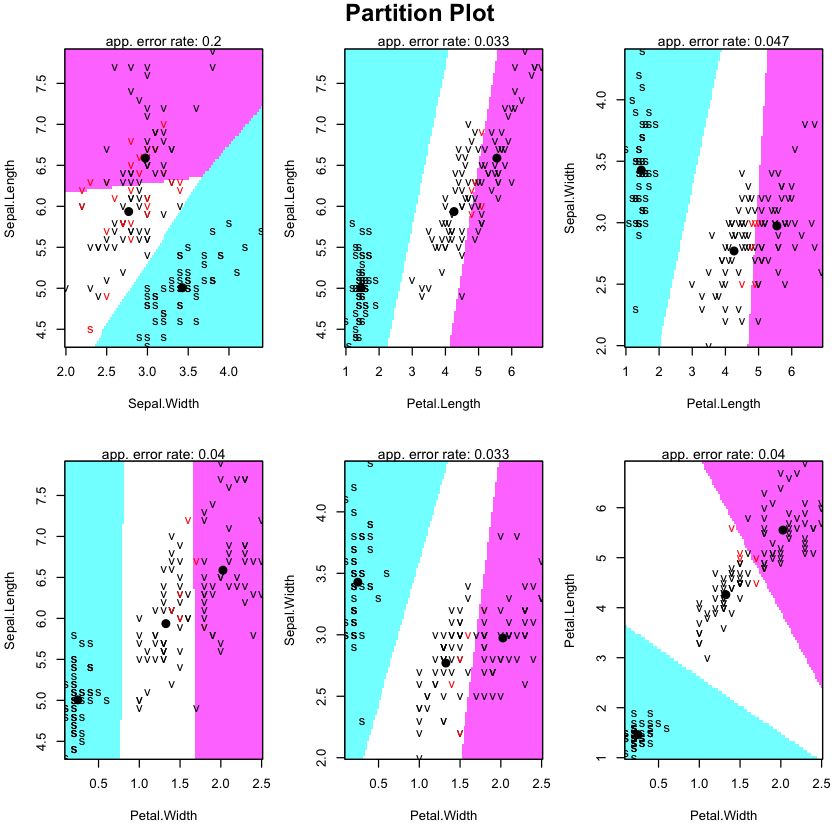

In [49]:
# Partition plot with linear discriminant analysis model in a two dimensional space
# exploratory graph for LDA

partimat(Species~., data=iris, method = "lda")

Call:
qda(Species ~ ., data = iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

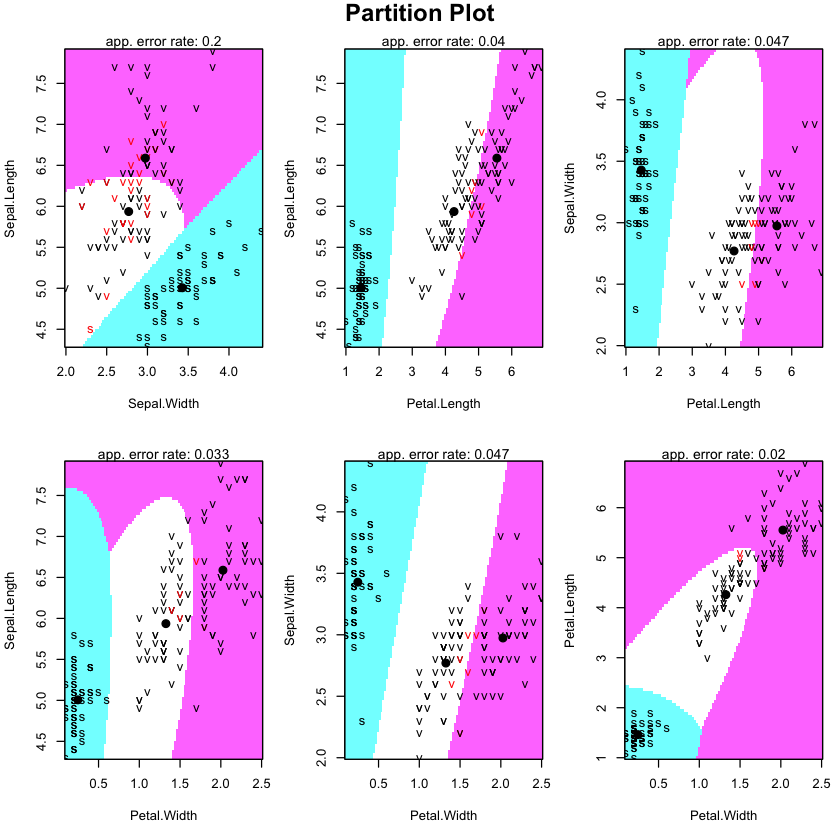

In [50]:
#quardratic discriminant analysis
fit.q = qda(Species ~ ., data=iris)
fit.q
#partition plot with linear discriminant analysis model in a two dimensional space
# exploratory graph for LDA
partimat(Species~., data=iris, method = "qda")

In [55]:
#confusion matrix 
#prediction of QDA : fit.q
result.class =predict(fit.q,iris)$class

#Two way table
tab2 = table(Predicted = result.class, Observed = iris$Species)

#result.class
#tab0 = table(Predicted=result.class, Actual = iris$Species)
#tab0

# Accuracy : the percentage of observation that were correctly classified 
sum(diag(tab2))/sum(tab2)

#the accuracy for this LDA is 0.98

# about 98% of observations were correctly classified by LDA

[1] 0.98

In [56]:
#Find the accurancy of QDA. 
#Prediction of LDA
result.class = predict(fit, iris)$class 

#two way table
tab1 = table(Predicted = result.class, Observed = iris$Species)

#Accuracy : the percentage of observation that were correctly classified
sum(diag(tab1))/sum(tab1)dd


[1] 0.98